# Predicting House Prices with Linear Regression

The target variable that we are trying to predict is a property's sale price in dollars.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

## Import data

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
test_data_submission = pd.read_csv('data/sample_submission.csv')

In [3]:
X_train= train_data.loc[:, ~train_data.columns.isin(['SaleType', 'SaleCondition', 'SalePrice'])]
y_train = train_data['SalePrice']

X_test = test_data
y_test = test_data_submission['SalePrice']


# Data exploration

/Users/veerleblom/opt/anaconda3/envs/progLab/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

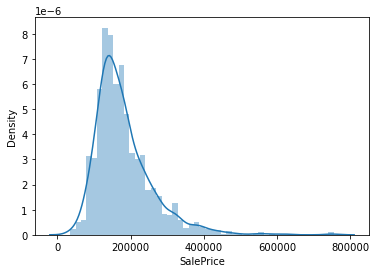

In [4]:
sns.distplot(y_train)

As you can see in the plot, most of the houses are sold for a price between 100000 and 200000 dollars. However, there are outliers on the precier side.

# Correlations between features

In order to counter the problem of needing to fit too many features to the data, we will decide what the most important features are using a heatmap. This heat map tells us which features have a high or low correlation with the sales prices, where a brighter color indicates a higher correlation.

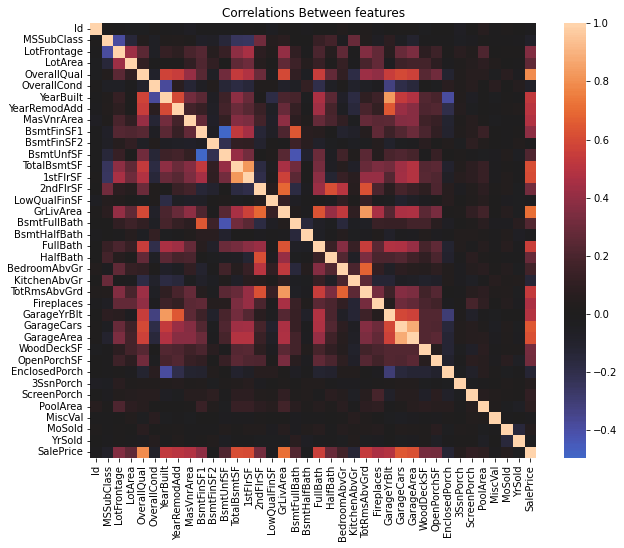

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), center = 0)
plt.title("Correlations Between features")
plt.show()

As visible in the heat map GrLivArea, OverallQual & GarageCars have the highest correlation with the sales price of houses. Therefore, we will first create a model which predicts the sales price of a house according to a given value for both features.


# Univariate linear regression

### 1. GrLivArea: Above grade (ground) living area square feet

In [6]:
X_train_GrLivArea = X_train['GrLivArea']
X_test_GrLivArea = X_test['GrLivArea']


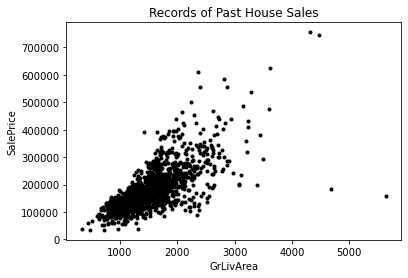

In [7]:
plt.plot(X_train_GrLivArea, y_train, '.', color='black');
plt.title('Records of Past House Sales')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


In general, the price of a house is higher when the living area is larger. However, there are a few outliers visible of houses with a large living are which are sold for a relatively small price.

In [8]:
X_train_GrLivArea = X_train_GrLivArea.values.reshape(-1, 1)
X_test_GrLivArea = X_test_GrLivArea.values.reshape(-1, 1)


In [9]:
# Create object for the class
linear_regressor = LinearRegression()

# Perform linear regression
linear_regressor.fit(X_train_GrLivArea, y_train)

# Make predictions
y_pred_GrLivArea = linear_regressor.predict(X_test_GrLivArea)

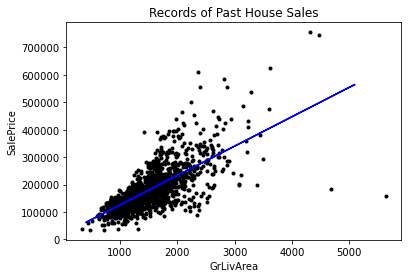

In [10]:
plt.plot(X_train_GrLivArea, y_train, '.', color='black')
plt.plot(X_test_GrLivArea, y_pred_GrLivArea, color='blue');
plt.title('Records of Past House Sales')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

To calculate the difference between the actual values of y and the predicted values of y we will use the root-mean-squared-error (RMSE). The RMSE is the standard deviation of prediction errors. These prediction errors are also known as residuals, which is a measure of how far the data points are from the regression line. It tells us how concentrated our data is around the line with the best possible fit. A lower value indicates a better fit to the data.

In [11]:
rmse = np.sqrt(mean_squared_error(y_pred_GrLivArea, y_test))
print("RMSE:", rmse)

RMSE: 44784.302527635606


### 2. OverallQual: Overall material and finish quality

In [12]:
X_train_OverallQual = X_train['OverallQual']
X_test_OverallQual = X_test['OverallQual']


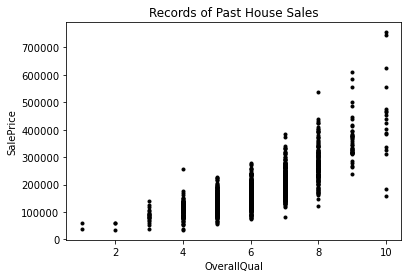

In [13]:
plt.plot(X_train_OverallQual, y_train, '.', color='black');
plt.title('Records of Past House Sales')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

In general, the price of a house is higher when the overall material and finish quality are higher.

In [14]:
X_train_OverallQual = X_train_OverallQual.values.reshape(-1, 1)
X_test_OverallQual = X_test_OverallQual.values.reshape(-1, 1)

In [15]:
# Create object for the class
linear_regressor2 = LinearRegression() 

# Perform linear regression
linear_regressor2.fit(X_train_OverallQual, y_train) 

# Make predictions
y_pred_OverallQual = linear_regressor2.predict(X_test_OverallQual)  

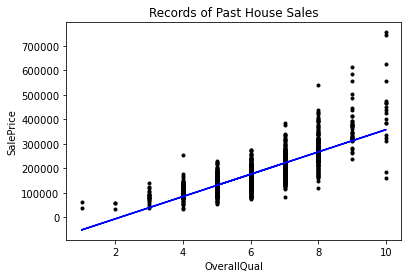

In [16]:
plt.plot(X_train_OverallQual, y_train, '.', color='black')
plt.plot(X_test_OverallQual, y_pred_OverallQual, color='blue');
plt.title('Records of Past House Sales')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

In [17]:
rmse = np.sqrt(mean_squared_error(y_pred_OverallQual, y_test))
print("RMSE:", rmse)

RMSE: 65805.78700340052


### 3. GarageArea: Size of garage in sqaure feet

In [18]:
# IT IS NOT WORKING FOR THIS FEATURE. THIS SEEMS TO BE CAUSED BY 
# INFINTIE VALUES IN THE DATA SET, BUT WE DON'T KNOW HOW TO REPLACE 
# THEM.

In [19]:
X_train_GarageArea = X_train['GarageArea']
X_test_GarageArea = X_test['GarageArea']

print(np.isnan(X_train_GarageArea.any()))
print(np.isfinite(X_train_GarageArea.all()))
print(X_train_GarageArea)

X_train_GarageArea.replace([np.inf, -np.inf], 0)

print(X_train_GarageArea)
print(np.isnan(X_train_GarageArea.any()))
print(np.isfinite(X_train_GarageArea.all()))


False
True
0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1460, dtype: int64
0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1460, dtype: int64
False
True


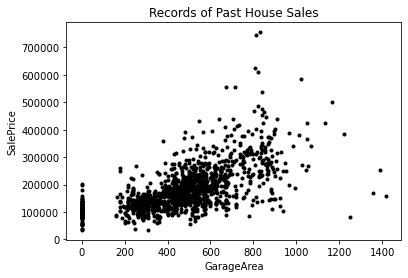

In [20]:
plt.plot(X_train_GarageArea, y_train, '.', color='black');
plt.title('Records of Past House Sales')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

In [21]:
X_train_GarageArea = X_train_GarageArea.values.reshape(-1, 1)
X_test_GarageArea = X_test_GarageArea.values.reshape(-1, 1)

In [22]:
# Create object for the class
linear_regressor3 = LinearRegression()

# Perform linear regression
linear_regressor3.fit(X_train_GarageArea, y_train) 

# Make predictions
y_pred_GarageArea = linear_regressor3.predict(X_test_GarageArea)  

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.plot(X_train_GarageArea, y_train, '.', color='black')
plt.plot(X_test_GarageArea, y_pred_GarageArea, color='blue');
plt.title('Records of Past House Sales')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

# Multiple linear regression

In this step, we are going to create a linear regression model, combining multiple features to predict the house price.

In [23]:
X_train_mv = train_data[['OverallQual', 'GrLivArea']]
y_train = train_data['SalePrice']

X_test_mv = test_data[['OverallQual', 'GrLivArea']]
y_test = test_data_submission['SalePrice']

Applying the data normalization below does not improve RMSE.

In [24]:
# X_train_mv = (X_train_mv - X_train_mv.mean()) / X_train_mv.std()


In [25]:
# Create object for the class
mv_linear_regressor = LinearRegression()

# Perform multivariate linear regression
mv_linear_regressor.fit(X_train_mv, y_train)

# Make predictions
y_pred_mv = mv_linear_regressor.predict(X_test_mv)


In [26]:
rmse = np.sqrt(mean_squared_error(y_pred_mv, y_test))
print("RMSE:", rmse)

RMSE: 63327.00976567326
